# *** 文档说明  ***

动手学计算机视觉

源码链接：https://github.com/Jackpopc/aiLearnNotes




## 1一数字图像处理
1.1 图像预处理之图像去噪
图像去噪是指减少图像中造成的过程。现实中的图像会受到各种因素的影响而含有一定的噪声，
噪声主要有以下几类：椒盐噪声、加性噪声、乘性噪声、高斯噪声。
图像去噪的方法有很多种，其中均值滤波、中值滤波等比较基础且成熟，还有一些基于数学中偏微分方
程的去噪方法，此外，还有基于频域的小波去噪方法。

完整代码地址：
https://github.com/jakpopc/aiLearnNotes/blob/master/computer_vision/image_denoising.py
requirement:scikit-image/opencv/numpy

In [5]:
#导包
import cv2
import numpy as np
import skimage
from skimage.util.dtype import convert

In [6]:
# 1读取图像

img = cv2.imread("D:/data/Pascal Voc/VOCdevkit/VOC2007/JPEGImages/000002.jpg")
cv2.imshow("origin_img",img)
cv2.waitKey()


-1

In [7]:
# 2生成噪声图像
# 方法一 就用Python第三方库scikit-image的random_noise添加噪声
import skimage
# mode 是可选参数，
#'gaussian'：高斯噪声
#'localvar'：局部var的高斯分布加性噪声、
#'salt'：椒盐噪声;
#'pepper':将随机像素替换为0(无符号图像)或-1(有符号图像);
#'s&p':标准普尔将随机像素替换为1或低val，其中低val为0的无符号图像或-1的signedimages;
#'speckle':使用out =图像+ n*图像的散斑乘噪声，其中n是具有指定均值和方差的均匀噪声。
noise_img = skimage.util.random_noise(img, mode="gaussian")
cv2.imshow("gaussian",noise_img)
cv2.waitKey()


-1

In [8]:
# 方法二 用numpy自己生成噪声
def add_noise(img):
    img = np.multiply(img,1./255,dtype=np.float64)
    mean,var=0,0.01
    noise = np.random.normal(mean,var**0.5,img.shape)
    img = convert(img,np.floating)
    out = img + noise
    return out
noise_img = add_noise(img)
cv2.imshow("noise_img",img)
cv2.waitKey()

d:\software\anaconda\envs\pt\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The use of this function is discouraged as its behavior may change dramatically in scikit-image 1.0. This function will be removedin scikit-image 1.0.
  


-1

In [9]:
# 3图像去噪
# 方法一：用cv2库的函数

# 中值滤波
denoise = cv2.medianBlur(img, ksize=3)
cv2.imshow("medianBlur_img",img)
cv2.waitKey()
# 均值滤波
denoise = cv2.fastNlMeansDenoising(img,h=3)
cv2.imshow("fastNlMeansDenoising",img)
cv2.waitKey()
# 高斯滤波
denoise = cv2.GaussianBlur(img,(3,3),0)
cv2.imshow("GaussianBlur",img)
cv2.waitKey()

-1

In [10]:
def compute_pixel_value(img, i, j, ksize, channel):
    h_begin = max(0, i - ksize // 2)
    h_end = min(img.shape[0], i + ksize // 2)
    w_begin = max(0, j - ksize // 2)
    w_end = min(img.shape[1], j + ksize // 2)
    return np.median(img[h_begin:h_end, w_begin:w_end, channel])

def denoise(img, ksize):
    output = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j, 0] = compute_pixel_value(img, i, j, ksize, 0)
            output[i, j, 1] = compute_pixel_value(img, i, j, ksize, 1)
            output[i, j, 2] = compute_pixel_value(img, i, j, ksize, 2)
    return output


In [12]:
output = denoise(noise_img, 3)
cv2.imshow("noise_img", output)
cv2.waitKey()

-1

## 1.2 图像预处理之图像增强
图像增强目的：增强图像中全局或局部有用的信息。
计算机视觉两部分组成：特征提取+模型训练。

图像增强方法：频域类、空间域类。
频域法：利用傅里叶、小波变换把图像矩阵变换成二维信号，利用滤波器进行滤波。
    低通滤波--去除噪声；高通滤波--增强边缘。
空间域方法： 直方图均衡化、滤波
基于滤波算法：均值滤波、中值滤波、高斯滤波。

In [ ]:
直方图均衡化：
将像素从小到大排序，统计像素概率和累积概率，用灰度级*累计概率就是应身后的新像素的像素值。

In [19]:
#导包
import cv2
from matplotlib import pyplot as plt

In [16]:
# 读取图片
img = cv2.imread("D:/data/Pascal Voc/VOCdevkit/VOC2007/JPEGImages/000002.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow("gray",gray)
cv2.waitKey()

-1

In [29]:
# opencv calcHist函数传入5个参数：
# images：图像
# channels：通道
# mask：图像掩码，可以填写None
# hisSize：灰度数目
# ranges：回复分布区间
def histogram(gray):
    hist = cv2.calcHist([gray],[0],None,[256],[0.0,255.0])
    plt.plot(range(len(hist)),hist)
    plt.title("orgin")
    plt.xlabel("x axis caption")
    plt.ylabel("y axis acption")
    plt.show()

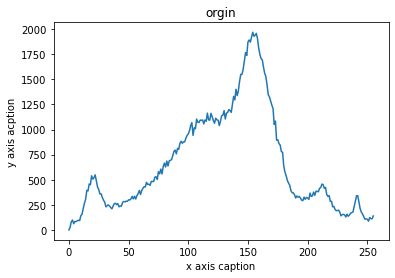

In [30]:
histogram(gray)

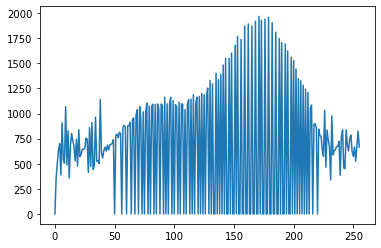

-1

In [28]:
# 直方图均衡化
dst = cv2.equalizeHist(gray)
histogram(dst)
cv2.imshow("dst",dst)
cv2.waitKey()

## 1.3 图像预处理之图像分割
主要包括两方面：非语义分割、语义分割。
非语义分割：只提取边缘。图像基础处理技术，不关注类别。 算法较多且成熟，研究时间长。
非语义分割算法：阈值分割，区域分割（区域生长和区域分裂合并），聚类，边缘分割，直方图，水平集

语义分割：不仅提取边缘像素级别，还要关注目标的类别。机器视觉技术。
语义分割算法：Grab cut Mask Rcnn U-Net FCN SegNet

In [ ]:
2015年 UCLA 相位拉伸变换（PST）
显著优点：速度快，精度高，思想简单，实现容易。
主要步骤：非线性相位离散化、阈值化、形态学运算。


In [37]:
# 导包
import os
import numpy as np
import mahotas as mh
import matplotlib.pylab as plt
import cv2

In [38]:
# 定义全局变量
L = 0.5
S = 0.48
W = 12.14
LPF = 0.5
Threshold_min = -1
Threshold_max = 0.0019
FLAG = 1 

In [39]:
#计算公式中的核心参数r,θ
#hypot() 返回欧几里德范数 sqrt(x*x + y*y)。
def cart2pol(x,y):
    theta = np.arctan2(y,x)# 角度
    rho = np.hypot(x,y)#模长
    return theta,rho

In [ ]:
# 生成变量p,q
# np.linespace 创建等差数列
#numpy.meshgrid()——生成网格点坐标矩阵
x = np.linspace(-L,L,img.shape[0])
y = np.linspace(-L,L,img.shape[1])
X , Y = np.meshgrid(x,y)
p,q = X.T,Y.T
theta , rho = caet2pol(p,q)

In [ ]:
# FFT变换
orig = np.fft.fft2(img)

In [ ]:
# 实现局部频响核
# ** 乘方
# power(x, y) 函数，计算 x 的 y 次方
expo = np.fft.fftshift(np.exp(-np.power((np.divide(rho,math.sqrt(（LPF**2）/np.log(2))))，2))

In [ ]:
# 相乘作图像平滑处理
orig_filtered = np.real(np.fft.ifft2((np.multiply(orig,expo))))

In [ ]:
# 实现相位核
# np.dot 向量点积（内积）和矩阵乘法
# np.dot(x,y) 和 np.dot(y,x) 得到的结果是不一样的
PST_Kernel_1 = np.multiply(np.dot(rho,w),np.arctan(np.dot(rho,w)))-0.5*np.log(1+np.power(np.dot(rho,w),2))
PST_Kernel = PST_Kernel_1/np.max(PST_Kernel_1)*S

In [ ]:
# 前面实现的部分与相位核做乘积
temp = np.multiply(np.fft.fftshift(np.exp(-1j* PST_Kernel)),np.fft.fft2(orig_filtered))

In [ ]:
# 逆快速傅里叶变换
temp = np.multiply(np.fft.fftshift(np.exp(-1j* PST_kernel)),np.fft.fft2(Image_orig_filtered))
orig_filtered_PST = np.fft.ifft2(temp)

In [ ]:
# 角运算,得到变换图像的相位
PHI_features = np.angle(Image_orig_filtered_PST)

In [ ]:
# 对图像进行阈值化处理，
# np.amax 返回数组的最大值
features = np.zeros((PHI_features.shape[0], PHI_features.shape[1]))
features[PHI_features > Threshold_max] = 1
features[PHI_features < Threshold_min] = 1
features[I < (np.amax(I) / 20)] = 0

In [ ]:
# 应用二进制形态学操作来清除转换后的图像,
out = features
out = mh.thin(out, 1)
out = mh.bwperim(out, 4)
out = mh.thin(out, 1)
out = mh.erode(out, np.ones((1, 1)))

In [42]:
# PST函数
def phase_stretch_transform(img, LPF, S, W, threshold_min, threshold_max, flag):
    L = 0.5
    x = np.linspace(-L, L, img.shape[0])
    y = np.linspace(-L, L, img.shape[1])
    [X1, Y1] = (np.meshgrid(x, y))
    X = X1.T
    Y = Y1.T
    theta, rho = cart2pol(X, Y)
    orig = ((np.fft.fft2(img)))
    expo = np.fft.fftshift(np.exp(-np.power((np.divide(rho, math.sqrt((LPF ** 2) / np.log(2)))),2)))
    orig_filtered = np.real(np.fft.ifft2((np.multiply(orig, expo))))
    PST_Kernel_1 = np.multiply(np.dot(rho, W), np.arctan(np.dot(rho, W))) - 0.5 * np.log(1 + np.power(np.dot(rho, W), 2))
    PST_Kernel = PST_Kernel_1 / np.max(PST_Kernel_1) * S
    temp = np.multiply(np.fft.fftshift(np.exp(-1j * PST_Kernel)), np.fft.fft2(orig_filtered))
    orig_filtered_PST = np.fft.ifft2(temp)
    PHI_features = np.angle(orig_filtered_PST)
    if flag == 0:
        out = PHI_features
    else:
        features = np.zeros((PHI_features.shape[0], PHI_features.shape[1]))
        features[PHI_features > threshold_max] = 1
        features[PHI_features < threshold_min] = 1
        features[img < (np.amax(img) / 20)] = 0
        out = features
        out = mh.thin(out, 1)
        out = mh.bwperim(out, 4)
        out = mh.thin(out, 1)
        out = mh.erode(out, np.ones((1, 1)))
    return out, PST_Kernel

In [45]:
# 主函数
def main():
    Image_orig = mh.imread("D:/data/Pascal Voc/VOCdevkit/VOC2007/JPEGImages/000002.jpg")
    if Image_orig.ndim == 3:
        Image_orig_grey = mh.colors.rgb2grey(Image_orig)
    else:
        Image_orig_grey = Image_orig
    edge, kernel = phase_stretch_transform(Image_orig_grey, LPF, S, W, Threshold_min,Threshold_max, FLAG)
    Overlay = mh.overlay(Image_orig_grey, edge)
    Edge = edge.astype(np.uint8)*255
    plt.imshow(Edge)
    plt.show()

## 1.4图像预处理之图像增广
定义：随机改变训练样本可以降低模型对某些属性的依赖，从而提高模型的泛化能力；
常用技术：
镜像变换
旋转
缩放
裁剪
平移
亮度修改
添加噪声
剪切
变换颜色

In [2]:
# 导包
import cv2
import numpy as np
from skimage.util.dtype import convert

In [5]:
# 1. 读取图像
img = cv2.imread("D:/data/Pascal Voc/VOCdevkit/VOC2007/JPEGImages/000023.jpg")
cv2.imshow("Origin", img)
cv2.waitKey()


-1

In [6]:
generate_img = np.zeros(img.shape)


In [10]:
# 水平镜像
h ,w = img.shape[0],img.shape[1] 
for i in range(h):
    for j in range(w):
        generate_img[i, w - 1 - j] = img[i, j]
cv2.imshow("Ver", generate_img)       
# cv2.imshow("Ver", generate_img.astype(np.uint8))
cv2.waitKey()
#备注：初始化的图像数据类型是numpy.float64，用opencv显示时无法正常显示，因此在显示时需
#要用astype(np.uint8)把图像转化成numpy.uint8数据格式。

-1

In [ ]:
class ImageAugmented(object):
    def __init__(self, path="D:/data/Pascal Voc/VOCdevkit/VOC2007/JPEGImages/000023.jpg"):
        self.img = cv2.imread(path)
        self.h, self.w = self.img.shape[0], self.img.shape[1]

    # 1. 镜像变换
    def flip(self, flag="h"):
        generate_img = np.zeros(self.img.shape)
        if flag == "h":
            for i in range(self.h):
                for j in range(self.w):
                    generate_img[i, self.h - 1 - j] = self.img[i, j]
        else:
            for i in range(self.h):
                for j in range(self.w):
                    generate_img[self.h - 1 - i, j] = self.img[i, j]
        return generate_img

    # 2. 缩放
    def _resize_img(self, shape=(100, 300)):
        return cv2.resize(self.img, shape)

    # 3. 旋转
    def rotated(self):
        center = cv2.getRotationMatrix2D((self.w / 2, self.h / 2), 45, 1)
        return cv2.warpAffine(self.img, center, (self.w, self.h))

    # 4. 平移
    def translation(self, x_scale=100, y_scale=100):
        move = np.float32([[1, 0, x_scale], [0, 1, y_scale]])
        return cv2.warpAffine(self.img, move, (self.w, self.h))

    # 5. 改变亮度
    def change_light(self, alpha=1.5, scale=3):
        return cv2.addWeighted(self.img, alpha, np.zeros(self.img.shape).astype(np.uint8), 1 - alpha, scale)

    # 6. 添加噪声
    def add_noise(self, mean=0, var=0.01):
        img = np.multiply(self.img, 1. / 255, dtype=np.float64)
        noise = np.random.normal(mean, var ** 0.5,
                                 img.shape)
        img = convert(img, np.floating)
        out = img + noise
        return out


if __name__ == '__main__':
    aug = ImageAugmented()
    img = aug.translation()
    cv2.imshow("img", img)
    cv2.waitKey()